In [1]:
# Step 1: Import important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load the California Housing Dataset

from sklearn.datasets import fetch_california_housing
# data = fetch_california_housing(as_frame=True)
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)


In [3]:
# Now Starts Data Visualization in different forms:
# print(data.frame.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
# The describe() method shows a summary of the numerical attributes
# data.frame.describe()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
# One can print stats of desired attributes, Example: lets take AveRooms, AveBedrms, AveOccup, and Population

features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
# california_housing.frame[features_of_interest].describe()
print(df[features_of_interest].describe())

           AveRooms     AveBedrms      AveOccup    Population
count  20640.000000  20640.000000  20640.000000  20640.000000
mean       5.429000      1.096675      3.070655   1425.476744
std        2.474173      0.473911     10.386050   1132.462122
min        0.846154      0.333333      0.692308      3.000000
25%        4.440716      1.006079      2.429741    787.000000
50%        5.229129      1.048780      2.818116   1166.000000
75%        6.052381      1.099526      3.282261   1725.000000
max      141.909091     34.066667   1243.333333  35682.000000


In [6]:
 # AveRooms is an attribute: One can take any numerical attribute from the dataset and can find its min, max, average etc values
# data.frame["AveRooms"].value_counts()
# data.frame["AveRooms"].max()
# data.frame['AveRooms'].min()

# Now you can access the 'AveRooms' column directly from the DataFrame
# Max value of AveRooms
max_ave_rooms = df["AveRooms"].max()
print(f"Max AveRooms: {max_ave_rooms}")

# Min value of AveRooms
min_ave_rooms = df['AveRooms'].min()
print(f"Min AveRooms: {min_ave_rooms}")

# Mean value of AveRooms
mean_ave_rooms = df['AveRooms'].mean()
print(f"Mean AveRooms: {mean_ave_rooms}")

# Count of unique values (though less useful for continuous data)
value_counts_ave_rooms = df["AveRooms"].value_counts()
print(f"Value counts of AveRooms: {value_counts_ave_rooms}")

Max AveRooms: 141.9090909090909
Min AveRooms: 0.8461538461538461
Mean AveRooms: 5.428999742190376
Value counts of AveRooms: AveRooms
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: count, Length: 19392, dtype: int64


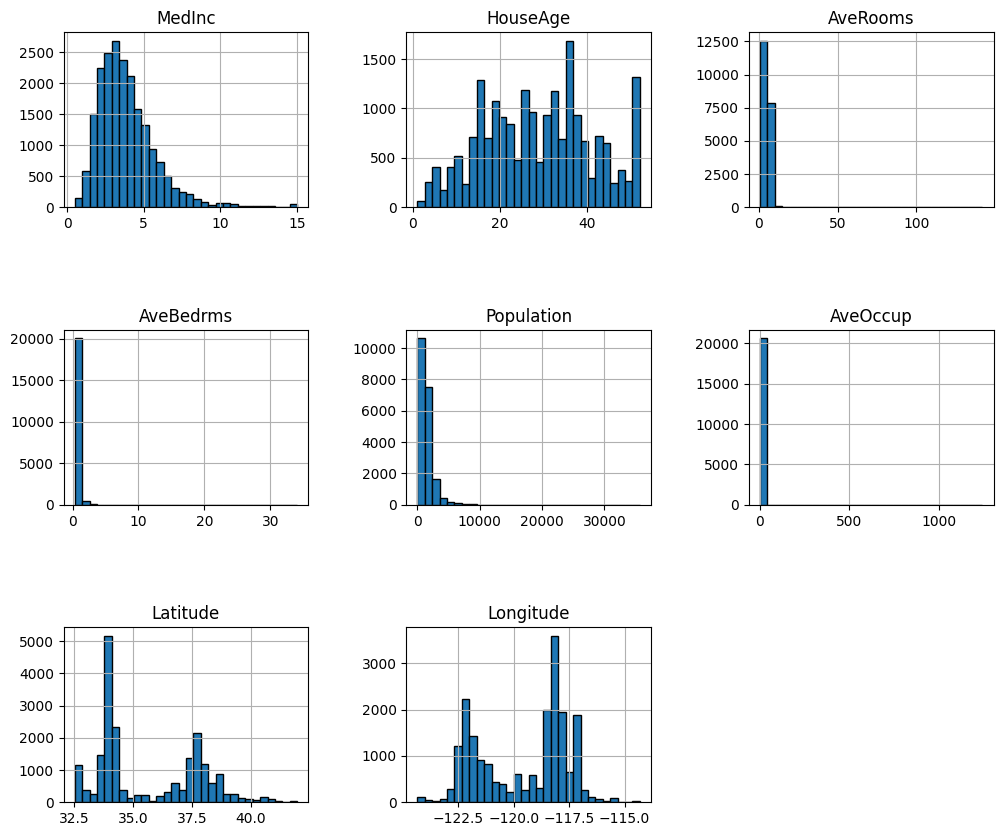

In [7]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute

import matplotlib.pyplot as plt

# data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
# plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Plot histograms for all the numerical attributes in the dataset
df.hist(figsize=(12, 10), bins=30, edgecolor="black")

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Show the plot
plt.show()


In [8]:

# Step 3: Create X = Input Features and Y = Target Variable
# X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
# y = pd.Series(data.target, name='target')  # Target variable


# Create X = Input Features (using california_housing.data)
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)  # Features

# Create y = Target Variable (using california_housing.target)
y = pd.Series(california_housing.target, name='target')  # Target variable

In [9]:
# Step 4: Explore the Dataset: Display the first few rows of the dataset

print(X.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [10]:
print(y.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64


In [11]:
# Step 5: Split the Dataset into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 6: Train the Linear Regression Model

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Step 6: Model Evaluation
# Once the model is trained, let's evaluate its performance using the test data. We'll calculate the Mean Squared Error (MSE) and R-squared (R²) score,
# which indicates how well the model fits the data.


# Predict on the test data
y_pred = lr_model.predict(X_test)


# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5558915986952442
Root Mean Squared Error: 0.7455813830127763
R-squared: 0.575787706032451


/Users/presidentlivingstone/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Summary of Model Performance:

### MSE = 0.56:
Indicates the squared error between predictions and true values.
### RMSE = 0.75:
Suggests that, on average, predictions are off by 0.75 units.
### R² = 0.58:
Indicates that the model explains 57.6% of the variance in the target variable. While it’s not perfect, it shows reasonable predictive power.


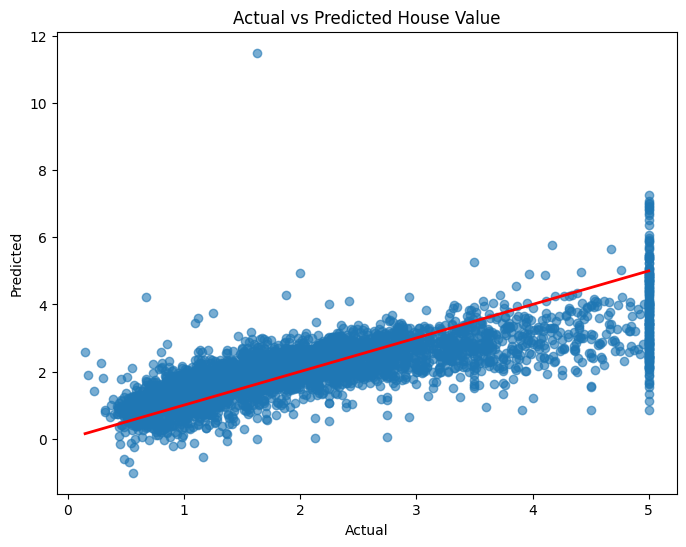

In [14]:
# Step 7: Visualize the Predictions

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Value')
plt.show()